<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/cifr10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import datetime

In [22]:
tf.__version__

'1.15.0'

In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

[2]


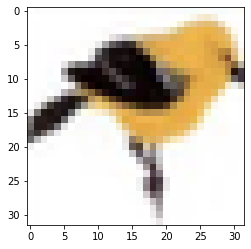

In [6]:
#visualizing random input
i = 30023
plt.imshow(x_train[i])
print(y_train[i])

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
categories = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
#converting y_train an y_test to categorical inputs

import keras
y_train = keras.utils.to_categorical(y_train,categories)
y_test = keras.utils.to_categorical(y_test,categories)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
#normalizing x_test and x_train

x_test = x_test/255
x_trainm = x_train/255

In [14]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [15]:
x_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [0]:
input_shape = x_train.shape[1:]

In [17]:
#building the model
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________

In [0]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])



In [20]:
epochs = 100

history = cnn.fit(x_train, y_train, batch_size =512, epochs = epochs)



Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.1301 - acc: 0.6018
Epoch 2/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0997 - acc: 0.6111
Epoch 3/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0776 - acc: 0.6200
Epoch 4/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0593 - acc: 0.6283
Epoch 5/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0343 - acc: 0.6352
Epoch 6/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0138 - acc: 0.6437
Epoch 7/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0027 - acc: 0.6476
Epoch 8/100
50000/50000 [==============================] - 4s 87us/sample - loss: 0.9720 - acc: 0.6569
Epoch 9/100
50000/50000 [==============================] - 4s 87us/sample - loss: 0.9587 - acc: 0.6636
Epoch 10/100
50000/50000 [========================

In [0]:
predicted_classes = cnn.predict_classes(x_test) 


In [23]:
#checking the accuracy
evaluation = cnn.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 108us/sample - loss: 3.9989 - acc: 0.1000
Test Accuracy: 0.10000000149011612
